In [57]:
import pandas as pd


In [59]:
import numpy as np


In [61]:
import matplotlib.pyplot as plt


In [63]:
import seaborn as sns


In [65]:
data = pd.read_csv('JAL_tripadvisor_reviews.csv')


In [67]:
print(data.head())


                                               title  \
0  Pleasant Flights For Senior Passengers From Ja...   
1            Dunno why people recommend this airline   
2                          BEST 5 HOURS FLIGHT EVER!   
3                     Nice Flight...Terrible Website   
4  Great Legroom, Best Flight Experience, On Sche...   

                                                text lang published_date  \
0  My elderly father, my aunt (  my late mother’s...   en     2024-11-05   
1  Dunno how people rate this airline as good, ea...   en     2024-10-21   
2  I flew Japan Airlines From Bangkok to Osaka, a...   en     2024-10-20   
3  In a way JAL reminds me of my entire Japan exp...   en     2024-10-19   
4  Great, maybe BEST flight experience. Always on...   en     2024-10-18   

  travel_date  helpful_votes  rating  
0  2024-05-31              0       4  
1  2024-10-31              0       1  
2  2024-10-31              2       5  
3  2023-12-31              1       5  
4  2024-08-

In [69]:
print(data.shape)


(9564, 7)


In [71]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           9564 non-null   object
 1   text            9564 non-null   object
 2   lang            9564 non-null   object
 3   published_date  9564 non-null   object
 4   travel_date     9252 non-null   object
 5   helpful_votes   9564 non-null   int64 
 6   rating          9564 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 523.2+ KB
None


In [73]:
print(data.describe())


       helpful_votes       rating
count    9564.000000  9564.000000
mean        1.258365     4.250941
std         3.907492     1.036596
min         0.000000     1.000000
25%         0.000000     4.000000
50%         1.000000     5.000000
75%         2.000000     5.000000
max       158.000000     5.000000


In [75]:
print(data.isnull().sum())


title               0
text                0
lang                0
published_date      0
travel_date       312
helpful_votes       0
rating              0
dtype: int64


In [77]:
print(data['rating'].value_counts())


rating
5    5037
4    3048
3     765
1     444
2     270
Name: count, dtype: int64


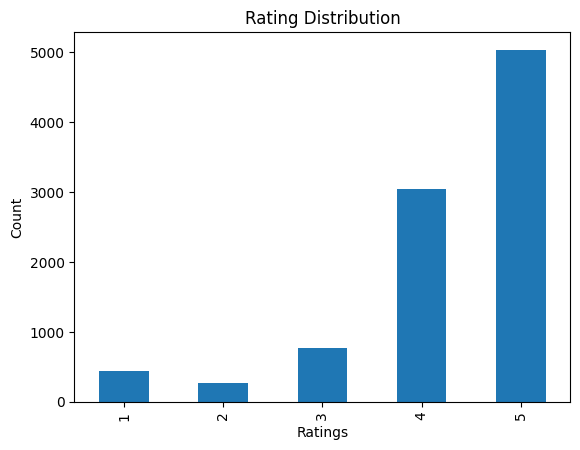

In [79]:
data['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [81]:
print(data['travel_date'].value_counts().head(5))


travel_date
2018-05-31    284
2016-07-31    280
2018-04-30    263
2018-01-31    235
2018-03-31    232
Name: count, dtype: int64


In [83]:
from collections import Counter
common_words = Counter(" ".join(data['title'].dropna()).split()).most_common(10)
print(common_words)


[('service', 409), ('and', 402), ('to', 344), ('flight', 336), ('JAL', 313), ('Great', 286), ('the', 248), ('Excellent', 180), ('with', 176), ('Service', 169)]


In [85]:
helpful_reviews = data.sort_values(by='helpful_votes', ascending=False).head(5)
print(helpful_reviews[['title', 'text', 'helpful_votes']])


           title                                               text  \
270       いつもJAL  2022年10月末に新千歳～大阪伊丹、2023年3月末に関空～新千歳をマイルで搭乗しました。...   
752       いつもJAL  新千歳～羽田を往復利用しました。\nいつもJALで快適な空の旅をしています。\n昨年9月から...   
602       いつもJAL  大津での所用のために、4月上旬にマイルで新千歳～伊丹を往復搭乗しました。\nコロナの影響は座...   
393  国内線はJYLオンリー  5月中旬、所用と次いでに観光のため新千歳～伊丹をマイルで往復搭乗しました。\n以前は1500...   
558       いつもJAL  今年度2回目のフライトで新千歳～羽田を往復利用。\nコロナ禍が収束するまではと、できるだけ避...   

     helpful_votes  
270            158  
752            116  
602            115  
393            111  
558            104  


In [87]:
print(data[['rating', 'helpful_votes']].corr())


                 rating  helpful_votes
rating         1.000000      -0.078639
helpful_votes -0.078639       1.000000


In [89]:
print(data['lang'].value_counts())


lang
ja      5446
en      3177
zhTW     350
es       134
fr       100
ru        99
it        41
de        39
ko        34
pt        30
th        28
in        26
zhCN      20
sv         9
cs         6
nl         5
vi         5
pl         5
no         2
fi         2
da         2
hu         2
ar         1
el         1
Name: count, dtype: int64


In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
reviews_data = pd.read_csv('JAL_tripadvisor_reviews.csv')


In [99]:
# Ensure 'published_date' is in datetime format
reviews_data['published_date'] = pd.to_datetime(reviews_data['published_date'], errors='coerce')


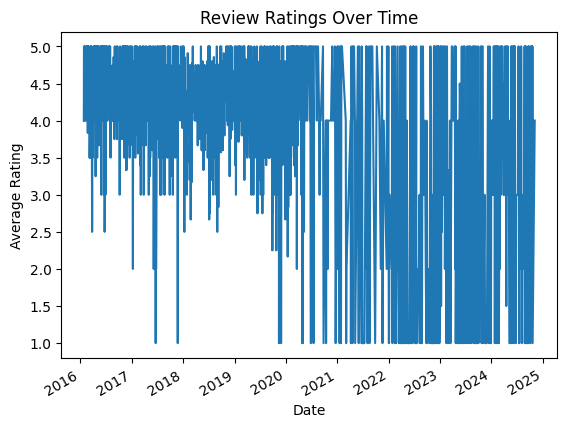

In [101]:
# Group by date and calculate average rating
reviews_data.groupby('published_date')['rating'].mean().plot(title='Review Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()


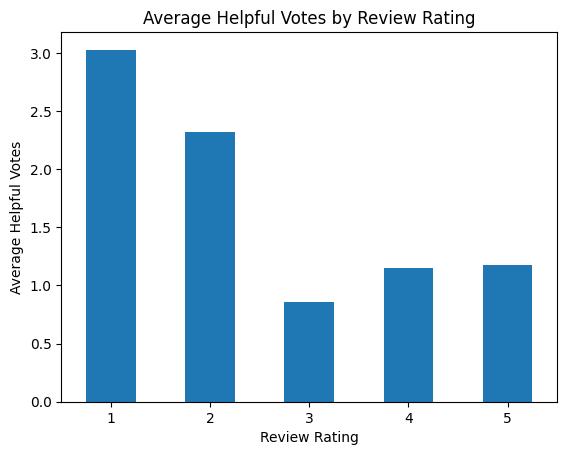

In [103]:
# Calculate average helpful votes by rating
helpful_votes_by_rating = reviews_data.groupby('rating')['helpful_votes'].mean()

# Simple bar chart
helpful_votes_by_rating.plot(kind='bar', title='Average Helpful Votes by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Average Helpful Votes')
plt.xticks(rotation=0)
plt.show()


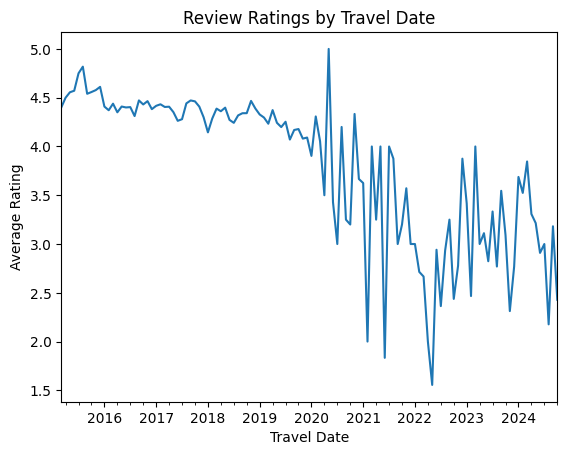

In [105]:
# Convert 'travel_date' to datetime format
reviews_data['travel_date'] = pd.to_datetime(reviews_data['travel_date'], errors='coerce')

# Plot average ratings by travel date
reviews_data.groupby('travel_date')['rating'].mean().plot(title='Review Ratings by Travel Date')
plt.xlabel('Travel Date')
plt.ylabel('Average Rating')
plt.show()


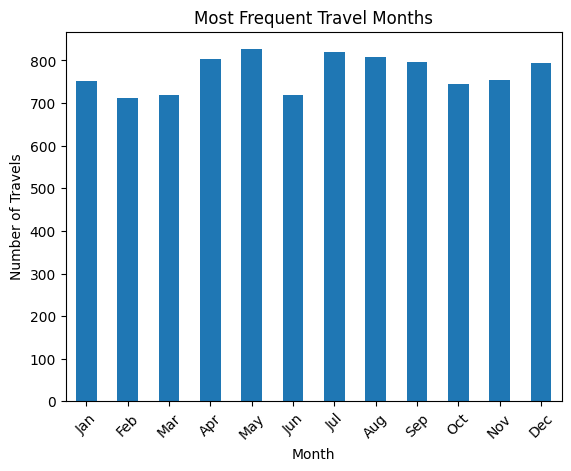

In [109]:
# Extract travel month and count frequency
reviews_data['travel_month'] = reviews_data['travel_date'].dt.month
travel_month_frequency = reviews_data['travel_month'].value_counts().sort_index()

# Plot the travel month frequency
travel_month_frequency.plot(kind='bar', title='Most Frequent Travel Months')
plt.xlabel('Month')
plt.ylabel('Number of Travels')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


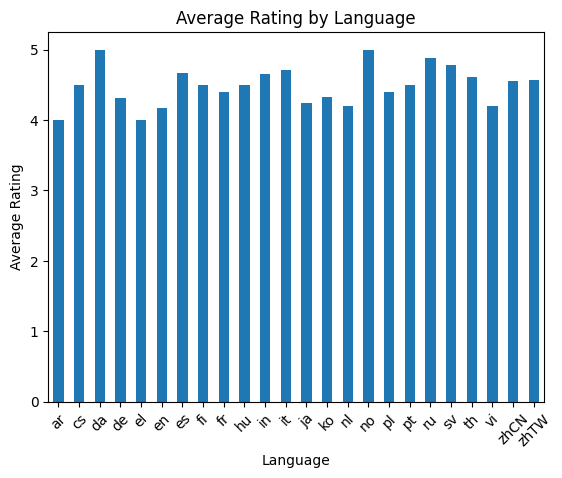

In [115]:
# Calculate average rating by language
average_rating_by_language = reviews_data.groupby('lang')['rating'].mean()

# Plot the average ratings by language
average_rating_by_language.plot(kind='bar', title='Average Rating by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#